#Part 1


In [61]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import time
import os
import sklearn as sci
# pytorch
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [62]:
path = "/content/drive/MyDrive/Technion/Semester 10/046746-Algorithms and Applications in Computer Vision/Homework/HW 3/code/"

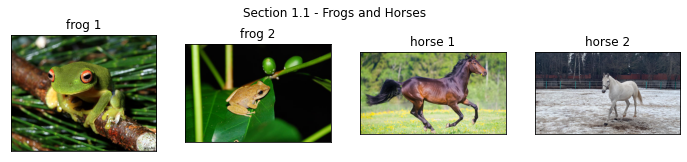

In [131]:
# Section 1.1
images = []
images.append((Image.open(f"{path}../data/frogs/frog1.jpg")))
images.append((Image.open(f"{path}../data/frogs/frog2.jpg")))
images.append((Image.open(f"{path}../data/horses/horse1.png")))
images.append((Image.open(f"{path}../data/horses/horse2.jpg")))

labels = ["frog 1", "frog 2", "horse 1", "horse 2"]
fig, axes = plt.subplots(1, len(images), figsize=(12,2.5))
for idx, image in enumerate(images):
    axes[idx].imshow(image)
    axes[idx].set_title(labels[idx])
    axes[idx].set_xticks([])
    axes[idx].set_yticks([])

fig.suptitle('Section 1.1 - Frogs and Horses')
plt.savefig(f'{path}../output/Section 1.1 - Images From Trainset.png')

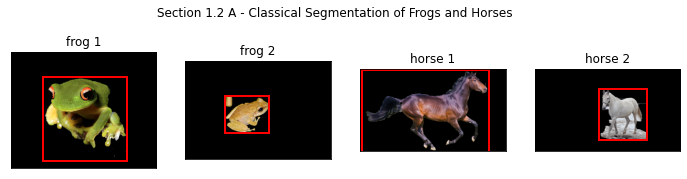

In [137]:
# Section 1.2 A

# Classic Segmentation - GrabCuts

def applyClassicSegmentation(images, rects, title, labels):

  fig, axes = plt.subplots(1, len(images), figsize=(12,3))

  bgdModel = np.zeros((1,65),np.float64)
  fgdModel = np.zeros((1,65),np.float64)

  for idx, image in enumerate(images):
    image = np.array(image)
    mask = np.zeros(image.shape[:2],np.uint8)
    cv2.grabCut(image,mask,rects[idx],bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    image = image*mask2[:,:,np.newaxis]
    
    # plot
    axes[idx].imshow(image)
    x, y, w, h = rects[idx]
    rect = patches.Rectangle((x,y),w,h, fill=None, edgecolor='r', linewidth=2)
    axes[idx].add_patch(rect)
    axes[idx].set_title(labels[idx])
    axes[idx].set_xticks([])
    axes[idx].set_yticks([])

  fig.suptitle(title)
  plt.savefig(f'{path}../output/{title}.png')

rects = [(110, 85, 290, 290), (160, 140, 180, 150), (13, 8, 895, 575), (600, 187, 450, 470)]
title = 'Section 1.2 A - Classical Segmentation of Frogs and Horses'
applyClassicSegmentation(images, rects, title, labels)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.5.0


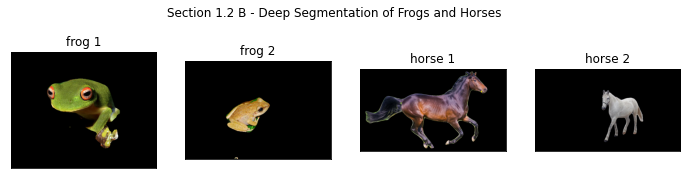

In [147]:
# Section 1.2 B

def applyDeepSegmentation(images, title, labels):

  # Deep Segmentation - DeepLabV3 RESNET 101
  # download and load the pre-trained model
  model = torch.hub.load('pytorch/vision:v0.5.0', 'deeplabv3_resnet101', pretrained=True)
  # put in inference mode
  model.eval();

  # define device
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

  # define the pre-processing steps
  # image->tensor, normalization
  preprocess = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),])
  fig, axes = plt.subplots(1, len(images), figsize=(12,3))

  for idx, image in enumerate(images):
    # perform pre-processing
    input_tensor = preprocess(image)
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch of size 1 as expected by the model
    # send to device
    model = model.to(device)
    input_batch = input_batch.to(device)
    
    # forward pass
    with torch.no_grad():
      output = model(input_batch)['out'][0]
    output_predictions = output.argmax(0)

    # create a color pallette, selecting a color for each class
    palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
    colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
    colors = (colors % 255).numpy().astype("uint8")

    # plot the semantic segmentation predictions of 21 classes in each color
    r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize((image.size))
    r.putpalette(colors)
    mask = (np.array(r) > 0)
    image = np.array(image) 
    image[:,:,0] = image[:,:,0] * mask
    image[:,:,1] = image[:,:,1] * mask
    image[:,:,2] = image[:,:,2] * mask

    # plot
    axes[idx].imshow( image)
    axes[idx].set_title(labels[idx])
    axes[idx].set_xticks([])
    axes[idx].set_yticks([])

  fig.suptitle(title)
  plt.savefig(f'{path}../output/{title}.png')
title = 'Section 1.2 B - Deep Segmentation of Frogs and Horses'
applyDeepSegmentation(images, title, labels)

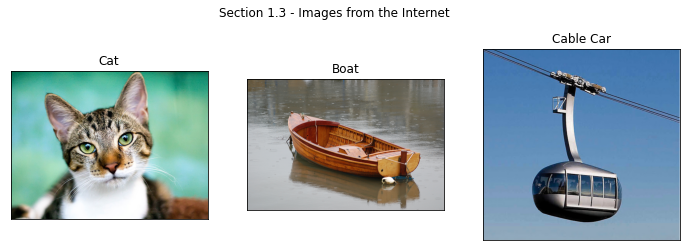

In [151]:
# Section 1.3

images = []
images.append(Image.open(f"{path}../data/my_data/cat.jpg"))
images.append(Image.open(f"{path}../data/my_data/boat.jpg"))
images.append(Image.open(f"{path}../data/my_data/cable-car.jpg"))

labels = ["Cat", "Boat", "Cable Car"]
fig, axes = plt.subplots(1, len(images), figsize=(12,4))
for idx, image in enumerate(images):
    axes[idx].imshow(image)
    axes[idx].set_title(labels[idx])
    axes[idx].set_xticks([])
    axes[idx].set_yticks([])

fig.suptitle('Section 1.3 - Images from the Internet')
plt.savefig(f'{path}../output/Section 1.3 - Images From the Internet.png')

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.5.0


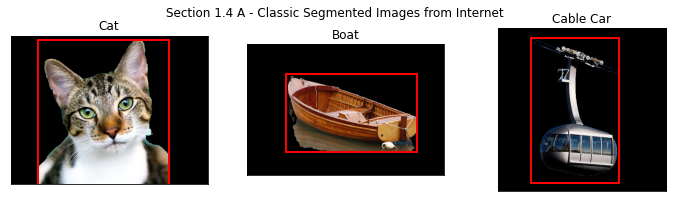

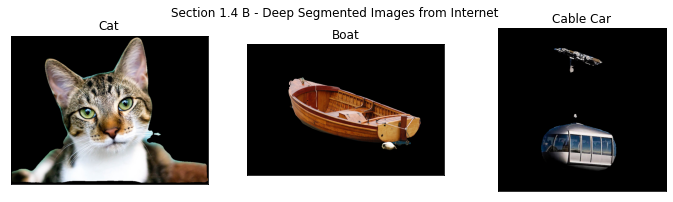

In [152]:
# Section 1.4

rects = [(125, 20, 600, 800), (600, 450, 2000, 1200), (100, 30, 270, 440)]
applyClassicSegmentation(images, rects, 'Section 1.4 A - Classic Segmented Images from Internet', labels)
applyDeepSegmentation(images, 'Section 1.4 B - Deep Segmented Images from Internet', labels)

In [ ]:
# Section 1.6
